在Python中处理时间序列的主要工具是pandas，pandas是由AQR资本管理公司的分析师Wes McKinney所开发的，从一开始就是为了处理金融时间序列而开发的。它的主要构成是一些基础类，比如DataFrame和Series类，这些类来自于统计分析语言R，无疑提升了这个建模和分析的力量。

In [1]:
import numpy as np
import pandas as pd

Dataframe对象的创建中主要有以下要点:
* Data: 数据本身可以由多种形状和类型给出（list, tuple, ndarray和dict对象都是可以选择的）
* Labels：数据应当按列排放，而这个列可以有个性化的名称
* Index：这里可以有一个索引，索引可以有不同的格式（例如：数字、字符串和信息）
* 在各个维度拓展DataFrame对象都是很容易的


In [29]:
df=pd.DataFrame([10,20,30,40],columns=['number'],index=['a','b','c','d'])
#DataFrame类似于SQL数据库以及电子表格应用的表格数据

In [30]:
df

,number
a,10
b,20
c,30
d,40


In [31]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [32]:
df.columns

Index(['number'], dtype='object')

In [33]:
df.loc['c']#for label based indexing

number    30
Name: c, dtype: int64

In [34]:
df.iloc[2]#for position based indexing

number    30
Name: c, dtype: int64

In [35]:
df.loc[['a','b']]

,number
a,10
b,20


In [36]:
df.loc[df.index[1:3]]#df.index[1:3]左闭右开区间

,number
b,20
c,30


In [37]:
df.sum()#类似于ndarray

number    100
dtype: int64

In [38]:
df.apply(lambda x:x**2)#对dataframe类应用apply和lamda函数,类似于ndarray

,number
a,100
b,400
c,900
d,1600


In [39]:
df['floats']=(1.5,2.5,3.5,4.5)#在各个维度拓展DataFrame对象都是很容易的
df

,number,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [40]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [41]:
df['name']=pd.DataFrame(['Yves','Guido','Felix','Francesc'], index=['d','a','b','c'])
#整个DataFrame对象也可以用于定义一个新列name，在这种情况下，指数自动对应。

In [42]:
df

,number,floats,name
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [43]:
df.append({'number':100,'floats':5.75,'name':'Henry'},ignore_index=True)
#在行下面append,可以是dict类，追加数据并不影响df本身
#索引被替代为一个单一的数字索引，原来的abcd被ignore了
#通常在给一个DataFrame对象进行追加的时候，都应当提供合适的索引信息，这会保持索引,而不是ignore_index=True

,number,floats,name
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [44]:
df.join(pd.DataFrame([1,4,9,16,25],index=['a','b','c','d','y'],columns=['squares',]))
#多出来的索引为y的数据并没有join进去
#使用join方法会忽略掉索引不存在的位置的数据

,number,floats,name,squares
a,10,1.5,Guido,1
b,20,2.5,Felix,4
c,30,3.5,Francesc,9
d,40,4.5,Yves,16


In [45]:
df=df.join(pd.DataFrame([1,4,9,16,25],index=['a','b','c','d','y'], columns=['squares',]),how='outer')
#为了保持数据，我们需要提供一个参数how=outer，这样在忽略数据的位置，会使用NaN来代替

In [46]:
df#这里的index=y有缺失的数据

,number,floats,name,squares
a,10.0,1.5,Guido,1
b,20.0,2.5,Felix,4
c,30.0,3.5,Francesc,9
d,40.0,4.5,Yves,16
y,NaN,NaN,NaN,25


In [47]:
df[['number','squares']].mean()#虽然存在缺失值，但是大多数方法仍然是可以工作的
#mean,忽略缺失值，求非缺失值的平均值

number     25.0
squares    11.0
dtype: float64

In [48]:
df[['number','squares']].std()

number     12.909944
squares     9.669540
dtype: float64

In [51]:
a=np.random.standard_normal((9,4))#生成模拟的伪随机数序列
#虽然可以直接生成DataFrame对象，通常在实践中还会使用一个ndarray对象来生成
#这个时候pandas会保持其基本的结构而且仅仅加入meta信息（例如：索引数值）。
#这是金融应用和一般科学研究的一种典型应用方式。

In [52]:
a.round(6)

array([[ 0.517811, -0.414104,  0.916567,  1.020332],
       [-0.150029, -0.161123,  0.01568 ,  1.036827],
       [ 1.267032, -1.336809, -0.88233 , -0.676312],
       [ 0.005986,  0.346226, -1.36978 ,  1.054449],
       [-0.043897,  0.056135, -1.865778,  0.197629],
       [ 0.157516, -0.649259, -0.990545, -0.017024],
       [ 0.520806,  0.04581 , -0.2194  ,  0.84531 ],
       [-0.916993,  0.840562,  0.2666  , -0.388873],
       [-1.399945,  0.926318,  0.707304, -0.177441]])

In [53]:
df=pd.DataFrame(a)
df

,0,1,2,3
0,0.517811,-0.414104,0.916567,1.020332
1,-0.150029,-0.161123,0.015680,1.036827
2,1.267032,-1.336809,-0.882330,-0.676312
3,0.005986,0.346226,-1.369780,1.054449
4,-0.043897,0.056135,-1.865778,0.197629
5,0.157516,-0.649259,-0.990545,-0.017024
6,0.520806,0.045810,-0.219400,0.845310
7,-0.916993,0.840562,0.266600,-0.388873
8,-1.399945,0.926318,0.707304,-0.177441


In [56]:
df.columns=[['No1','No2','No3','No4']]#DataFrame对象有列名属性，可以通过list来进行赋值
df

,No1,No2,No3,No4
0,0.517811,-0.414104,0.916567,1.020332
1,-0.150029,-0.161123,0.015680,1.036827
2,1.267032,-1.336809,-0.882330,-0.676312
3,0.005986,0.346226,-1.369780,1.054449
4,-0.043897,0.056135,-1.865778,0.197629
5,0.157516,-0.649259,-0.990545,-0.017024
6,0.520806,0.045810,-0.219400,0.845310
7,-0.916993,0.840562,0.266600,-0.388873
8,-1.399945,0.926318,0.707304,-0.177441


In [55]:
df['No2'][3]

0.34622597575814956

In [61]:
dates=pd.date_range('2018-1-1',periods=9,freq='M')
#pandas的date_range函数可以提供有效的处理时间的方法
#9个时间点，频率是month，不包括起始日期

In [62]:
dates#datetime类

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='M')

In [63]:
df.index=dates

In [64]:
df

,No1,No2,No3,No4
2018-01-31,0.517811,-0.414104,0.916567,1.020332
2018-02-28,-0.150029,-0.161123,0.015680,1.036827
2018-03-31,1.267032,-1.336809,-0.882330,-0.676312
2018-04-30,0.005986,0.346226,-1.369780,1.054449
2018-05-31,-0.043897,0.056135,-1.865778,0.197629
2018-06-30,0.157516,-0.649259,-0.990545,-0.017024
2018-07-31,0.520806,0.045810,-0.219400,0.845310
2018-08-31,-0.916993,0.840562,0.266600,-0.388873
2018-09-30,-1.399945,0.926318,0.707304,-0.177441


In [65]:
np.array(df).round(6)
#将DataFrame转换成NumPy.ndarray同样是可行的

array([[ 0.517811, -0.414104,  0.916567,  1.020332],
       [-0.150029, -0.161123,  0.01568 ,  1.036827],
       [ 1.267032, -1.336809, -0.88233 , -0.676312],
       [ 0.005986,  0.346226, -1.36978 ,  1.054449],
       [-0.043897,  0.056135, -1.865778,  0.197629],
       [ 0.157516, -0.649259, -0.990545, -0.017024],
       [ 0.520806,  0.04581 , -0.2194  ,  0.84531 ],
       [-0.916993,  0.840562,  0.2666  , -0.388873],
       [-1.399945,  0.926318,  0.707304, -0.177441]])

Pandas的DataFrame类也提供了大量方便的方法。例如，你可以很容易的计算按列的求和、平均值和累计和。

In [67]:
df.sum()

No1   -0.041713
No2   -0.346243
No3   -3.421684
No4    2.894896
dtype: float64

In [68]:
df.mean()

No1   -0.004635
No2   -0.038471
No3   -0.380187
No4    0.321655
dtype: float64

In [69]:
df.cumsum()

,No1,No2,No3,No4
2018-01-31,0.517811,-0.414104,0.916567,1.020332
2018-02-28,0.367782,-0.575227,0.932246,2.057159
2018-03-31,1.634815,-1.912036,0.049916,1.380846
2018-04-30,1.640800,-1.565810,-1.319864,2.435296
2018-05-31,1.596903,-1.509675,-3.185642,2.632924
2018-06-30,1.754419,-2.158934,-4.176187,2.615900
2018-07-31,2.275225,-2.113124,-4.395588,3.461210
2018-08-31,1.358232,-1.272562,-4.128987,3.072337
2018-09-30,-0.041713,-0.346243,-3.421684,2.894896


In [70]:
df.describe()#提供了一个数据集常用统计指标获取的函数

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.004635,-0.038471,-0.380187,0.321655
std,0.790138,0.714357,0.953681,0.679227
min,-1.399945,-1.336809,-1.865778,-0.676312
25%,-0.150029,-0.414104,-0.990545,-0.177441
50%,0.005986,0.045810,-0.219400,0.197629
75%,0.517811,0.346226,0.266600,1.020332
max,1.267032,0.926318,0.916567,1.054449


In [74]:
np.sqrt(df)
#可以对DataFrame对象应用大多数的NumPy一般函数
#Pandas具有一定的容错特性，在这个条件下，如果数学运算失败，它会将放置一个NaN值

C:\Users\13673\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2018-01-31,0.719591,NaN,0.957375,1.010115
2018-02-28,NaN,NaN,0.125219,1.018247
2018-03-31,1.125625,NaN,NaN,NaN
2018-04-30,0.077367,0.588410,NaN,1.026864
2018-05-31,NaN,0.236927,NaN,0.444554
2018-06-30,0.396882,NaN,NaN,NaN
2018-07-31,0.721669,0.214034,NaN,0.919407
2018-08-31,NaN,0.916822,0.516334,NaN
2018-09-30,NaN,0.962454,0.841013,NaN


In [75]:
np.sqrt(df).sum()
#处理这种不完全的数据集与完整数据集是一样的。通常，pandas会忽略掉缺失的错误数据而只针对可得数据进行处理。

C:\Users\13673\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.041135
No2    2.918647
No3    2.439940
No4    4.419187
dtype: float64

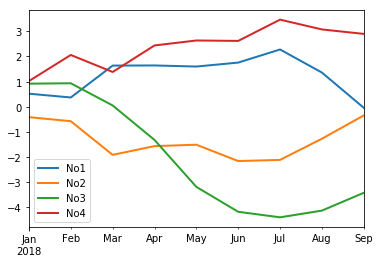

In [76]:
import matplotlib as mpl
%matplotlib inline
df.cumsum().plot(lw=2.0)#可以直接应用matplotlib的函数

In [77]:
type(df)#dataframe类

pandas.core.frame.DataFrame

In [78]:
df['No1']
type(df['No1'])#每个column是series类

pandas.core.series.Series

Text(0,0.5,'value')

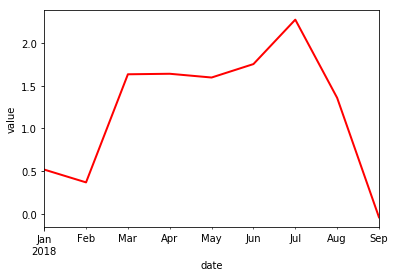

In [79]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r',lw=2.)
plt.xlabel('date')
plt.ylabel('value')

Pandas提供了强大而灵活的分组功能，这与SQL中的分组以及excel中的数据透视表类似。为了演示groupby功能，我们增加一列表示季度。

In [80]:
df['Quarter']=['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']

In [81]:
df

,No1,No2,No3,No4,Quarter
2018-01-31,0.517811,-0.414104,0.916567,1.020332,Q1
2018-02-28,-0.150029,-0.161123,0.015680,1.036827,Q1
2018-03-31,1.267032,-1.336809,-0.882330,-0.676312,Q1
2018-04-30,0.005986,0.346226,-1.369780,1.054449,Q2
2018-05-31,-0.043897,0.056135,-1.865778,0.197629,Q2
2018-06-30,0.157516,-0.649259,-0.990545,-0.017024,Q2
2018-07-31,0.520806,0.045810,-0.219400,0.845310,Q3
2018-08-31,-0.916993,0.840562,0.266600,-0.388873,Q3
2018-09-30,-1.399945,0.926318,0.707304,-0.177441,Q3


In [82]:
groups=df.groupby('Quarter')

In [83]:
groups

In [84]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.544938,-0.637345,0.016639,0.460282
Q2,0.039868,-0.082299,-1.408701,0.411685
Q3,-0.598711,0.604230,0.251501,0.092999


In [85]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.267032,-0.161123,0.916567,1.036827
Q2,0.157516,0.346226,-0.990545,1.054449
Q3,0.520806,0.926318,0.707304,0.845310


In [86]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

分组也可以针对多列进行，为了演示这一点，我们增加另外一列，代表着这个月是大月还是小月。增加这一列可以共同用于分组。

In [87]:
df['Odd_Even']=['Odd','Even','Odd','Even','Odd','Even','Odd','Odd','Even']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2018-01-31,0.517811,-0.414104,0.916567,1.020332,Q1,Odd
2018-02-28,-0.150029,-0.161123,0.015680,1.036827,Q1,Even
2018-03-31,1.267032,-1.336809,-0.882330,-0.676312,Q1,Odd
2018-04-30,0.005986,0.346226,-1.369780,1.054449,Q2,Even
2018-05-31,-0.043897,0.056135,-1.865778,0.197629,Q2,Odd
2018-06-30,0.157516,-0.649259,-0.990545,-0.017024,Q2,Even
2018-07-31,0.520806,0.045810,-0.219400,0.845310,Q3,Odd
2018-08-31,-0.916993,0.840562,0.266600,-0.388873,Q3,Odd
2018-09-30,-1.399945,0.926318,0.707304,-0.177441,Q3,Even


In [88]:
groups=df.groupby(['Quarter','Odd_Even'])

In [89]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [90]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.150029 -0.161123  0.015680  1.036827
        Odd       0.892422 -0.875456  0.017118  0.172010
Q2      Even      0.081751 -0.151517 -1.180163  0.518713
        Odd      -0.043897  0.056135 -1.865778  0.197629
Q3      Even     -1.399945  0.926318  0.707304 -0.177441
        Odd      -0.198094  0.443186  0.023600  0.228218

pandas允许我们很方便的从网络上获取数据，例如从Yahoo Finance，并且用多种方式来分析这样的数据。

我们将使用pandas的内置函数DataReader来从Yahoo Finance获取金融数据，分析数据并且生成数据图表。
所需要的函数需要引入pandas的一个子库。目前，pandas支持下列数据源：
* Yahoo finance
* Google finance
* St.Louis FED
* Kenneth French’s data libarary
* World Bank

In [92]:
from pandas_datareader import data as web

In [93]:
DAX=web.DataReader(name='^GDAXI',data_source='yahoo',start='2000-1-1',end='2018-1-1')
DAX.info()
#德国的DAX指数

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4571 entries, 2000-01-03 to 2017-12-29
Data columns (total 6 columns):
High         4571 non-null float64
Low          4571 non-null float64
Open         4571 non-null float64
Close        4571 non-null float64
Volume       4571 non-null float64
Adj Close    4571 non-null float64
dtypes: float64(6)
memory usage: 250.0 KB


In [94]:
DAX.tail()#tail()方法可以给我们展示数据集的最后五列

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-21,13137.709961,13013.629883,13065.790039,13109.740234,70360200.0,13109.740234
2017-12-22,13108.559570,13059.870117,13076.759766,13072.790039,52876700.0,13072.790039
2017-12-27,13128.740234,13020.429688,13070.190430,13070.019531,44677000.0,13070.019531
2017-12-28,13069.400391,12965.280273,13065.459961,12979.940430,43152100.0,12979.940430
2017-12-29,12980.740234,12911.730469,12980.089844,12917.639648,42169200.0,12917.639648


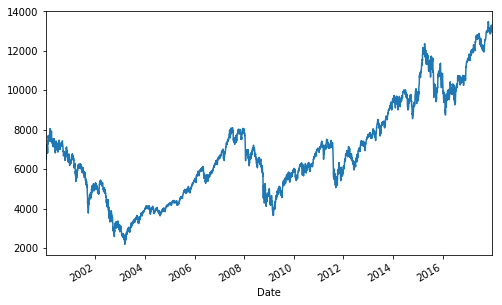

In [95]:
DAX['Close'].plot(figsize=(8,5))

In [114]:
#下面来计算对数收益率，分别使用循环的方式和向量化的方式，比较效率
#循环
%time DAX['Ret_loop']=0.0
for i in range(1,len(DAX)):
    DAX['Ret_loop'][i]=np.log(DAX['Close'][i]/DAX['Close'][i-1])

Wall time: 0 ns


In [106]:
DAX[['Close','Ret_loop']].tail()

,Close,Ret_loop
Date,,
2017-12-21,13109.740234,0.003099
2017-12-22,13072.790039,-0.002823
2017-12-27,13070.019531,-0.000212
2017-12-28,12979.940430,-0.006916
2017-12-29,12917.639648,-0.004811


In [108]:
#向量化，使用shift
%time DAX['return']=np.log(DAX['Close']/DAX['Close'].shift(1))#shift(1)向前

Wall time: 997 µs


In [115]:
del DAX['Ret_loop']#delete一列，因为loop与return是相同的

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C5B17D30>,
      dtype=object)

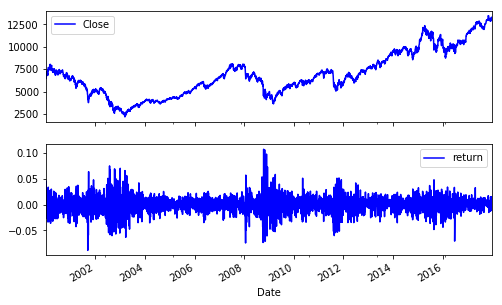

In [116]:
DAX[['Close','return']].plot(subplots=True,style='b',figsize=(8,5))

图形中显示了股票收益的两个事实:
* 波动聚类：波动率对时间不是常数，有较高波动率（较高的正收益或负收益）和较低波动率的时期。
* 杠杆效应：波动率和股票市场收益是负相关的，当市场下降的时候波动率上升，反之亦然。

In [118]:
#技术分析的股票交易员通常关心移动平均，或称为趋势，
#移动平均可以使用pandas的rolling_mean函数很容易得到
#还存在其他的rolling函数，包括rolling_max，rolling_min和rolling_corr
#DAX['42d']=pd.rolling_mean(DAX['Close'],window=42)
#DAX['252d']=pd.rolling_mean(DAX['Close'],window=252)
#pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with
#Series.rolling(window=252,center=False).mean()
DAX['42d']=DAX['Close'].rolling(window=42,center=False).mean()
DAX['252d']=DAX['Close'].rolling(window=252,center=False).mean()

In [119]:
DAX[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2017-12-21,13109.740234,13131.689802,12410.144950
2017-12-22,13072.790039,13133.108840,12416.496338
2017-12-27,13070.019531,13135.885254,12422.825819
2017-12-28,12979.940430,13132.234305,12428.892846
2017-12-29,12917.639648,13125.093820,12434.593560


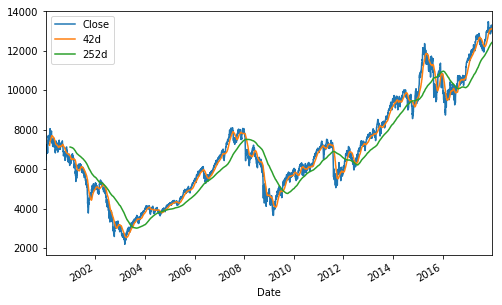

In [120]:
DAX[['Close','42d','252d']].plot(figsize=(8,5))

期权投资者关心平均对数收益率的历史标准差，也就是移动平均历史波动率。

In [121]:
import math

In [123]:
DAX['MOV_vol']=DAX['return'].rolling(window=252,center=False).std()*math.sqrt(252)#rolling_std算的是日度的标准差，要换算成年度的标准差

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C5C43588>,
      dtype=object)

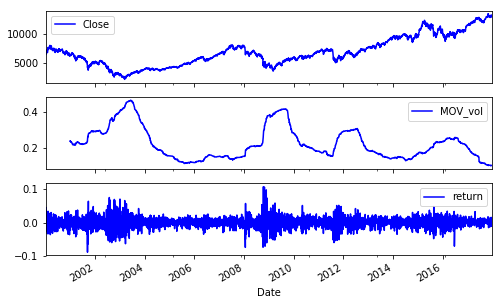

In [124]:
DAX[['Close','MOV_vol','return']].plot(subplots=True,style='b',figsize=(8,5))

收盘价格与波动率体现出明显的杠杆效应。

基于对金融数据图形的观察，我们看到波动率与股价之间存在着明显的波动效应，为了在统计上证明这一点，我们选择两个不同的数据集，并用线性回归的方式证明这一点:
* EURO STOXX 50：EURO STOXX 50指数的历史日度收盘价格，这个指数包括的是欧洲蓝筹股票。
* VSTOXX：VSTOXX波动率指数的历史日度收盘价格，计算的基础是EURO STOXX 50指数的隐含波动率。
* 需要注意的是我们现在使用了隐含波动率，它相关于对未来波动率运动的预期，而前面的DAX分析使用的是历史波动率

In [130]:
es_url='http://www.stoxx.com/download/historical_values/hbrbcpe.txt'#从网络上获取数据存在data文件夹中
vs_url='http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urllib.request.urlretrieve(es_url,'./data/es.txt')
urllib.request.urlretrieve(vs_url,'./data/vs.txt')

('./data/vs.txt', <http.client.HTTPMessage at 0x1a0c7379668>)

直接使用pandas来读入EURO STOXX 50数据并不好，我们应当事先做一些数据清洗的工具以使我们导入一个更好的数据结构：
* 文件头部有一些信息是我们不希望导入的。
* 从2001年12月27日以后，数据集在每行末尾突然出现了一个逗号。

In [131]:
lines=open('./data/es.txt','r').readlines()
lines=[line.replace(' ','') for line in lines]#首先我们读入整个数据集并去掉所有的空白
lines[:6]#通过打印数据集的开始几行，我们可以看到文件头的一些性质

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [135]:
for line in lines[3883:3900]:
    print(line[41:])#大约从（3883-3990行）开始，数据出现了问题，在每行的末尾增加了一个分号。

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;

332.91;279.80;5752.12;397.50;

329.58;278.12;5742.73;395.17;

326.43;275.64;5569.88;380.31;

327.32;274.87;5571.19;377.83;

323.56;273.65;5530.61;373.06;

325.97;275.62;5574.77;377.93;

317.92;270.32;5366.05;361.10;

320.54;272.48;5327.05;361.24;

316.49;270.75;5248.82;355.92;

321.82;272.28;5345.49;362.68;



为了数据集可以方便的引入，我们需要做以下的调整：
* 生成一个新的文本文件。
* 删除不需要的文件头几行
* 写入合适的头部行
* 增加一个帮助列，DEL
* 将所有的数据写入到一个新的文件。
* 读入数据的数据清洗操作。

In [136]:
new_file=open('./data/es50.txt','w')#生成一个新的文本文件，并向其写入write
new_file.writelines('date'+lines[3][:-1]+';DEL'+lines[3][-1])#写入合适的头部行,去掉\n,增加delete列（为了去掉之后的分号），增加\n
new_file.writelines(lines[4:])#删除不需要的文件头几行
new_file.close()

In [139]:
new_lines=open('./data/es50.txt','r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [140]:
es=pd.read_csv('./data/es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)#读取成dataframe
np.round(es.tail())#date列是index,并且读取成date

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [141]:
del es['DEL']#去掉多余的分号
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [149]:
#利用read_csv函数可以更简单地处理文本文件读取
cols=['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
es=pd.read_csv(es_url,index_col=0,parse_dates=True,sep=';',dayfirst=True,header=None,skiprows=4,names=cols)
es.tail()
#这里为什么不能使用header=4,直接去掉头，是因为去掉4行头之后，默认第五行是colname,那么3887列的分号无法处理

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [146]:
vs=pd.read_csv('./data/vs.txt',index_col=0,header=2,parse_dates=True,sep=',',dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [147]:
vs.tail()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [174]:
import datetime as dt
data=pd.DataFrame({'EUROSTOXX':es['SX5E'][(es.index>dt.datetime(1999,1,1))&(es.index<dt.datetime(2016,2,15))]})
data=data.join(pd.DataFrame({'VSTOXX':vs['V2TX'][(vs.index>dt.datetime(1999,1,1))&(vs.index<dt.datetime(2016,2,15))]}))
#因为VSTOXX数据仅仅在1999年1月以后才有，因此我们的数据都是从这一点开始,2016-2-15后，VSTOXX数据全部缺失
data.tail()

,EUROSTOXX,VSTOXX
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664
2016-02-10,2789.05,33.4528
2016-02-11,2680.35,38.3051
2016-02-12,2756.16,35.6846


In [175]:
#对于中间的缺失数据，我们使用最近可获得的时间序列的值，我们调用fillna方法，提供ffill参数（含义是forward fill）
#另外一个选项是bfill，（含义是backward fill），这样的话会产生“foresight”的问题
data=data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4387 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
EUROSTOXX    4387 non-null float64
VSTOXX       4387 non-null float64
dtypes: float64(2)
memory usage: 262.8 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C8636FD0>,
      dtype=object)

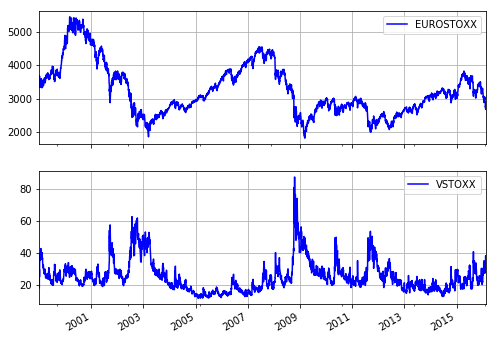

In [176]:
data.plot(subplots=True,grid=True,style='b',figsize=(8,6))

在图中，我们会看到这两个变量之间存在一定的负相关关系

In [177]:
rets=np.log(data/data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C86D1EB8>,
      dtype=object)

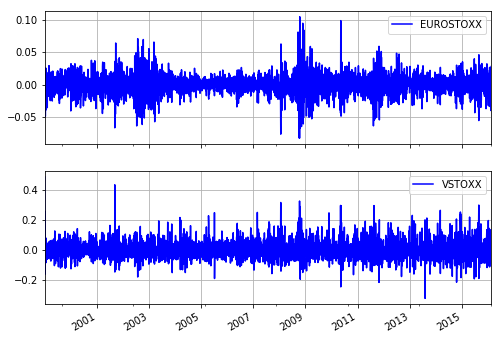

In [178]:
rets.plot(subplots=True,grid=True,style='b',figsize=(8,6))

In [179]:
#使用EURO STOXX 50收益作为自变量，VSTOXX收益作为因变量进行回归分析。
import statsmodels.formula.api as smf
model = smf.ols(formula=' VSTOXX~ EUROSTOXX', data=rets).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5212.
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:11:21   Log-Likelihood:                 7966.3
No. Observations:                4386   AIC:                        -1.593e+04
Df Residuals:                    4384   BIC:                        -1.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -9.51e-06      0.001     -0.016      0.987      -0.001       0.001
EUROSTOXX     -2.8461      0.039    -72.194      0.000      -2.923      -2.769
==============================================================================
Omnibus:                     1316.059   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24623.464
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                      14.451   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
model.params

Intercept   -0.000010
EUROSTOXX   -2.846059
dtype: float64

可以通过beta系数来看到明显的负相关，-2.8461。

Text(0,0.5,'VSTOXX returns')

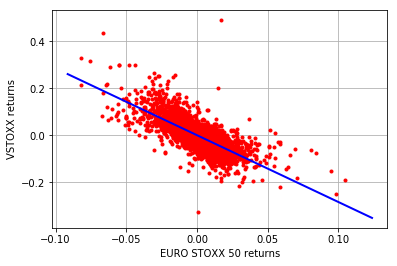

In [191]:
xdat=rets['EUROSTOXX']
ydat=rets['VSTOXX']
plt.plot(xdat,ydat,'r.')#散点图
ax=plt.axis()
x=np.linspace(ax[0],ax[1]+0.01)#ax[0] 0.0, ax[1] 1.0
plt.plot(x,model.params[0]+model.params[1]*x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [192]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.00000,-0.73698
VSTOXX,-0.73698,1.00000


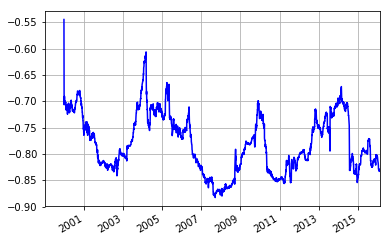

In [194]:
rets['EUROSTOXX'].rolling(window=252).corr(other=rets['VSTOXX']).plot(grid=True,style='b')

高频数据处理的方法（目前无法下载数据，仅提供演示）

In [218]:
url1='http;//hopey.netfonds.no/posdump.php?'
url2='date=%s%s%s&paper=AAPL.O&csv_format=csv'
url=url1+url2
#挪威的在线经纪商Netfonds提供了大量股票的高频数据，特别是美国股票，我们可以从网络上获得数据
year='2015'
month='11'
days=['23','24','25','26']
#我们要来分析苹果公司一周左右的高频数据，首先是导入数据
AAPL=pd.DataFrame()
for day in days:
    AAPL=AAPL.append(pd.read_csv(url %(year,month,day),index_col=0,header=0,parse_dates=True))
AAPL.columns=['bid','bdepth','bdeptht','offer','odepth','odeptht']#shorter column names
AAPL.info()
AAPL['bid'].plot()
to_plot=AAPL[['bid','bdeptht']][
    (AAPL.index>dt.datetime(2014,12,11,0,0))
    & (AAPL.index<dt.datetime(2014,12,12,2,59))
]
#在某一个市场开放的时候，有着较高的交易行为。
#本图显示了样本中第一天的交易行为和第三天最后三个小时的行为，可以看到在交易前，美国股市开盘以及结束后的情况
to_plot.plot(subplots=True,style='b',figsize=(8,5))
AAPL_resam=AAPL.resample(rule='5min',how='mean')
np.roud(AAPL_resam.head(),2)
AAPL_resam['bid'].fillna(method='ffill').plot()
#通常情况下，金融高频数据会导致DatetimeIndex非常不规律。在这种情况下，对于数据进行再抽样通常是非常有用的
#pandas为DataFrame对象提供了这样一个方法来协助
#我们在这里使用均值作为再抽样的依据。这样图形看起来就更平滑，我们在这里还使用缺失值之前的最近数据对缺失值进行了调整
def reversal(x):
    return 2*95-x
AAPL_resam['bid'].fillna(method='ffill').apply(reversal).plot()
#我们使用了一个用户自定义的无意义函数应用于我们的新数据集

FileNotFoundError: File b'http;//hopey.netfonds.no/posdump.php?date=20151123&paper=AAPL.O&csv_format=csv' does not exist